# Question 4 (25 marks) 
You are optimizing a baking process for producing whole-grain snack crackers. The key quality attribute is crispness (measured in acoustic crunch units, ACU), which should be above 60 ACU for consumer acceptability. 
Data was collected from 12 pilot baking runs, varying three process parameters:

| Baking Temp (°C) | Bake Time (min) | Dough Moisture (%) | Crispness (ACU) |
|------------------|-----------------|--------------------|-----------------|
| 160              | 10              | 22                 | 52              |
| 170              | 10              | 20                 | 61              |
| 180              | 10              | 18                 | 70              |
| 190              | 10              | 16                 | 78              |
| 200              | 14              | 14                 | 85              |
| 210              | 14              | 12                 | 90              |
| 170              | 18              | 22                 | 55              |
| 180              | 18              | 20                 | 63              |
| 190              | 18              | 18                 | 68              |
| 200              | 22              | 16                 | 70              |
| 210              | 22              | 14                 | 74              |
| 220              | 22              | 12                 | 79              |


A model needs to be developed to predict Crispness (y) using other variables. 

A notebook containing variable correlations, fitted multiple linear regression model to predict crispness, model diagnostics (RMSE/R2/ residual plot) has been provided to you. 

## Instructions
Answer the following questions based on the above results. **Pls write your answers in this notebook**. Then download, rename with student ID and email the notebook to bandarad@uom.lk.

## Part D2 (10 marks) 
1.	Rank the importance of the three variables (Baking Temperature, Bake Time, Dough Moisture) in influencing snack crispness. Justify using coefficient magnitudes, signs, and physical understanding of baking and moisture removal during drying. 
2.	Would you recommend using this model for optimizing crispness in future production? Justify based on statistical reliability, coefficient interpretability, and risk of extrapolation beyond the data range. 
3.	Based on the model, what combination of process settings would you suggest to achieve crispness above 80 ACU while minimizing energy use (i.e., lower temperature or shorter time)? Explain your reasoning, including any trade-offs involved.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

Dataset:
    Temp  Time  Moisture  Crispness
0    160    10        22         52
1    170    10        20         61
2    180    10        18         70
3    190    10        16         78
4    200    14        14         85
5    210    14        12         90
6    170    18        22         55
7    180    18        20         63
8    190    18        18         68
9    200    22        16         70
10   210    22        14         74
11   220    22        12         79


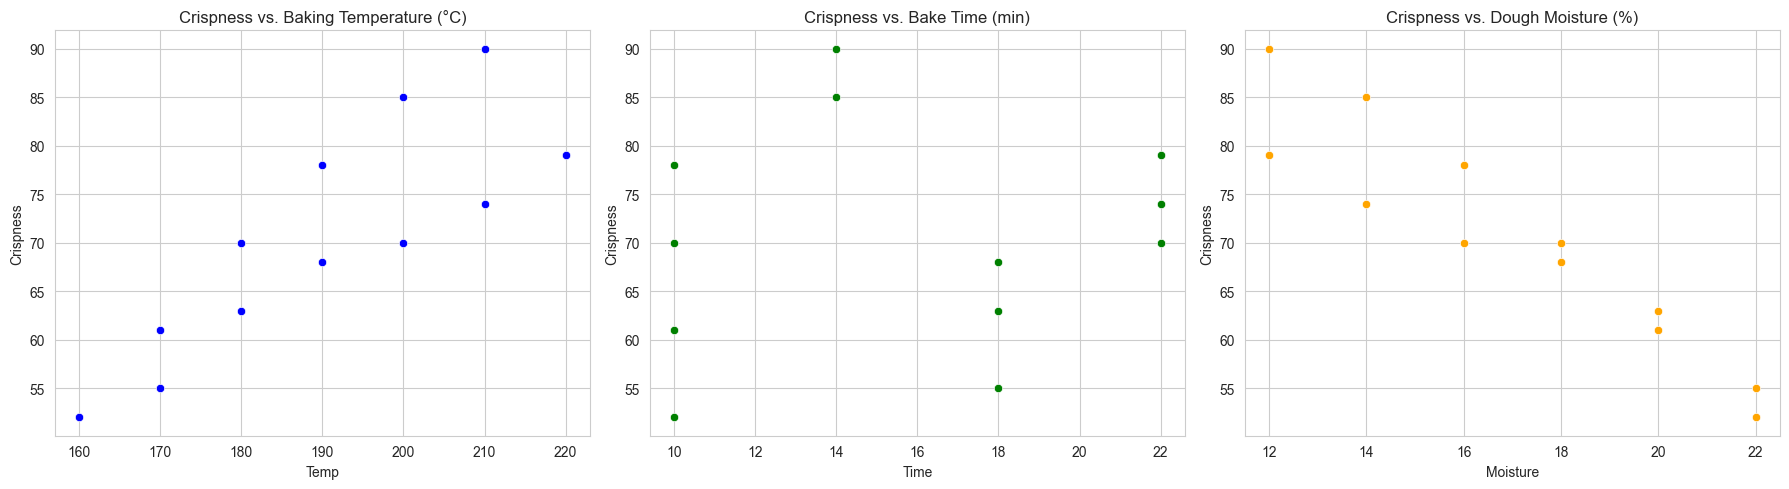


Pearson Correlation Coefficients with Crispness:
Temp        0.843
Time        0.120
Moisture   -0.938
Name: Crispness, dtype: float64

Strongest linear correlation with Crispness: Moisture


In [2]:
# ---
# Create dataset
data = {
    'Temp': [160, 170, 180, 190, 200, 210, 170, 180, 190, 200, 210, 220],
    'Time': [10, 10, 10, 10, 14, 14, 18, 18, 18, 22, 22, 22],
    'Moisture': [22, 20, 18, 16, 14, 12, 22, 20, 18, 16, 14, 12],
    'Crispness': [52, 61, 70, 78, 85, 90, 55, 63, 68, 70, 74, 79]
}

df = pd.DataFrame(data)
print("Dataset:")
print(df)

# Generate scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='Temp', y='Crispness', data=df, ax=axes[0], color='blue')
axes[0].set_title('Crispness vs. Baking Temperature (°C)')

sns.scatterplot(x='Time', y='Crispness', data=df, ax=axes[1], color='green')
axes[1].set_title('Crispness vs. Bake Time (min)')

sns.scatterplot(x='Moisture', y='Crispness', data=df, ax=axes[2], color='orange')
axes[2].set_title('Crispness vs. Dough Moisture (%)')

plt.tight_layout()
plt.show()

# Compute Pearson correlations
correlations = df[['Temp', 'Time', 'Moisture', 'Crispness']].corr()['Crispness']
print("\nPearson Correlation Coefficients with Crispness:")
print(correlations[['Temp', 'Time', 'Moisture']].round(3))

# Identify strongest linear correlation
strongest_var = correlations[['Temp', 'Time', 'Moisture']].abs().idxmax()
print(f"\nStrongest linear correlation with Crispness: {strongest_var}")

In [4]:
# ---
# Part B (6 marks)
# Fit multiple linear regression model:
# Crispness = b0 + b1*Temp + b2*Time + b3*Moisture
# Report equation with coefficients rounded to 3 decimal places
# ---

X = df[['Temp', 'Time', 'Moisture']]
y = df['Crispness']

model = LinearRegression()
model.fit(X, y)

b0 = model.intercept_
b1, b2, b3 = model.coef_

print("Fitted Multiple Linear Regression Equation:")
print(f"Crispness = {b0:.3f} + {b1:.3f}×Temp + {b2:.3f}×Time + ({b3:.3f})×Moisture")

Fitted Multiple Linear Regression Equation:
Crispness = 5.974 + 0.519×Temp + -1.118×Time + (-0.982)×Moisture


R² (Coefficient of Determination): 0.931
RMSE (Root Mean Square Error): 2.895


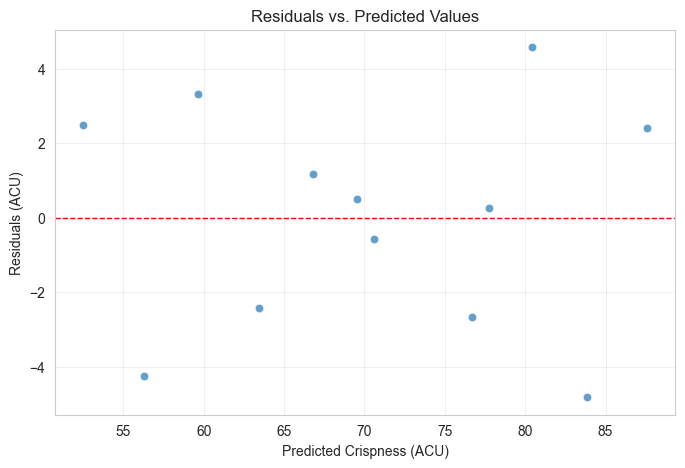

In [7]:
# ---
# Part C (5 marks)
# • R², RMSE
# • Residuals vs. Predicted plot
# • Comment on patterns
# ---

y_pred = model.predict(X)
residuals = y - y_pred

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R² (Coefficient of Determination): {r2:.3f}")
print(f"RMSE (Root Mean Square Error): {rmse:.3f}")

# Plot residuals vs predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted Crispness (ACU)')
plt.ylabel('Residuals (ACU)')
plt.title('Residuals vs. Predicted Values')
plt.grid(True, alpha=0.3)
plt.show()



# Part D2 - Answers

Questions:

- Rank the importance of the three variables (Baking Temperature, Bake Time, Dough Moisture) in influencing snack crispness. Justify using coefficient magnitudes, signs, and physical understanding of baking and moisture removal during drying.
- Would you recommend using this model for optimizing crispness in future production? Justify based on statistical reliability, coefficient interpretability, and risk of extrapolation beyond the data range.
- Based on the model, what combination of process settings would you suggest to achieve crispness above 80 ACU while minimizing energy use (i.e., lower temperature or shorter time)? Explain your reasoning, including any trade-offs involved.


Answers: 